# Non-Stationary Gaussian Processes: Generating data

This script generates datasets to test approaches to modeling non-stationary Gaussian processes.

In [1]:
import pandas as pd
import plotly.graph_objects as go
import torch
from IPython.display import Image
from plotly.subplots import make_subplots

import utils

image_type = "static"  # html / static

In [2]:
# First create some 1D data with a range of lengthscales of variation

# Parameters
n_data = 200
noise_amp = 0.1
n_lengthscales = 5
n_chunks = 10
wavelength_min_m = 1
wavelength_max_m = 20
start_x = 0
end_x = 10

# Generate the underlying function
true_x = torch.linspace(start_x, end_x, 1000)
true_y, input_sines_y = utils.generate_piecewise_function(
    true_x,
    n_lengthscales,
    wavelength_min_m,
    wavelength_max_m,
)

# Generate training data
train_x, train_y = utils.sample_noisy_data(true_x, true_y, n_data, noise_amp)

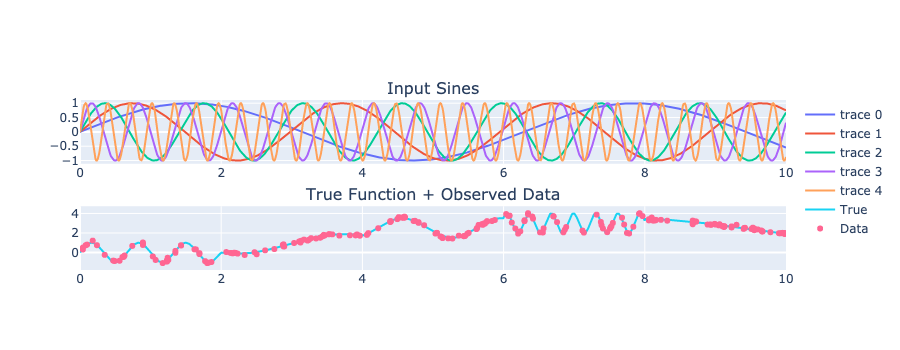

In [ ]:
# Plot the data

fig = make_subplots(
    rows=2,
    cols=1,
    subplot_titles=["Input Sines", "True Function + Observed Data"],
)

# Input sines
for i in range(n_lengthscales):
    fig.add_trace(go.Scatter(x=true_x, y=input_sines_y[i], mode="lines"), row=1, col=1)

# True function
fig.add_trace(go.Scatter(x=true_x, y=true_y, mode="lines", name="True"), row=2, col=1)

# Sampled data
fig.add_trace(
    go.Scatter(x=train_x, y=train_y, mode="markers", name="Data"),
    row=2,
    col=1,
)
fig.update_xaxes(range=[0, 10])

if image_type == "html":
    fig.show()
elif image_type == "static":
    display(Image(fig.to_image(format="png", width=900, height=350)))


## Save the dataset

In [7]:
# Save the dataset

filename_identifier = "E"
save_files = False

# Form data frame
df_true = pd.DataFrame(
    {
        "x": true_x.numpy(),
        "y": true_y.numpy(),
    },
)

df_obs = pd.DataFrame(
    {
        "x": train_x.numpy(),
        "y": train_y.numpy(),
    },
)

# Save the data
if save_files:
    df_true.to_csv(f"data/true_data_{filename_identifier}.csv", index=False)
    df_obs.to_csv(f"data/observed_data_{filename_identifier}.csv", index=False)
